In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

folder_path = "/content/drive/My Drive/MINI_PRO"

if os.path.exists(folder_path):
    print("Folder found!")
else:
    print("Folder not found. Check the path again.")

Folder found!


In [ ]:
!pip install causal-conv1d>=1.4.0

In [ ]:
!pip install mamba_ssm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mamba_ssm: filename=mamba_ssm-2.2.4-cp311-cp311-linux_x86_64.whl size=323672993 sha256=8a0be01153fa30727a9e69024fbe061eb92c7ba4416d2049c5fc3107ed91d852
  Stored in directory: /root/.cache/pip/wheels/2a/5e/64/cfcb5dfe4f854944456e031c34953dc872af1ad7c206145d4a
Successfully built mamba_ssm


In [ ]:
from mamba_ssm import Mamba
print("Mamba installed successfully!")

Mamba installed successfully!


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load datasets
train_dataset = datasets.ImageFolder(root='/content/drive/My Drive/MINI_PRO/training_set', transform=transform)
test_dataset = datasets.ImageFolder(root='/content/drive/My Drive/MINI_PRO/test_set', transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoModelForImageClassification

# Load Pretrained MambaVision Model
model = AutoModelForImageClassification.from_pretrained("nvidia/MambaVision-S-1K", trust_remote_code=True)
model.cuda()  # Move model to GPU
model.train()  # Set to training mode

# Define Loss Function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-5)

# Training Loop
num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.cuda(), labels.cuda()

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs["logits"], labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

print("Training Completed!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/36.4k [00:00<?, ?B/s]

configuration_mambavision.py:   0%|          | 0.00/625 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/MambaVision-S-1K:
- configuration_mambavision.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_mambavision.py:   0%|          | 0.00/27.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/MambaVision-S-1K:
- modeling_mambavision.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


model.safetensors:   0%|          | 0.00/201M [00:00<?, ?B/s]

Epoch [1/30], Loss: 4.6041
Epoch [2/30], Loss: 1.4675
Epoch [3/30], Loss: 0.6158
Epoch [4/30], Loss: 0.3284
Epoch [5/30], Loss: 0.1968
Epoch [6/30], Loss: 0.1768
Epoch [7/30], Loss: 0.1484
Epoch [8/30], Loss: 0.0984
Epoch [9/30], Loss: 0.0894
Epoch [10/30], Loss: 0.0549
Epoch [11/30], Loss: 0.0439
Epoch [12/30], Loss: 0.0608
Epoch [13/30], Loss: 0.0310
Epoch [14/30], Loss: 0.1016
Epoch [15/30], Loss: 0.0522
Epoch [16/30], Loss: 0.0835
Epoch [17/30], Loss: 0.0580
Epoch [18/30], Loss: 0.0500
Epoch [19/30], Loss: 0.0380
Epoch [20/30], Loss: 0.0285
Epoch [21/30], Loss: 0.0418
Epoch [22/30], Loss: 0.0518
Epoch [23/30], Loss: 0.0770
Epoch [24/30], Loss: 0.0433
Epoch [25/30], Loss: 0.0688
Epoch [26/30], Loss: 0.0180
Epoch [27/30], Loss: 0.0201
Epoch [28/30], Loss: 0.0256
Epoch [29/30], Loss: 0.0431
Epoch [30/30], Loss: 0.0334
Training Completed!



✅ Test Accuracy: 98.46%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       214
           1       0.97      0.98      0.98       110

    accuracy                           0.98       324
   macro avg       0.98      0.98      0.98       324
weighted avg       0.98      0.98      0.98       324



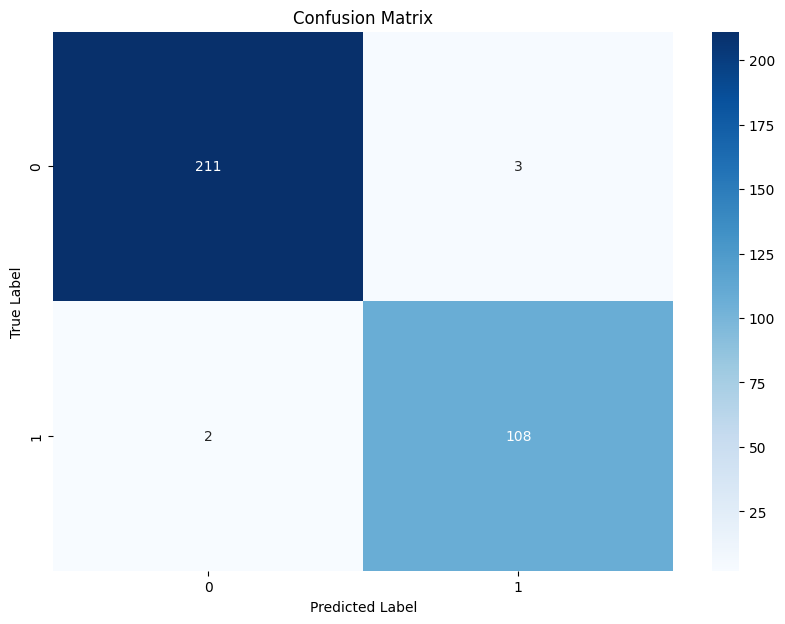


❌ Misclassified Images (Filename | Predicted | Actual):
145239fb-fb30-4f81-8c48-c79a88fdeb13.jpg | Predicted: 1 | Actual: 0
a7c32060-815c-4d62-b41c-b6b2f9f61e26.jpg | Predicted: 1 | Actual: 0
fc8453a8-7c52-4653-b495-8089d89e3129.jpg | Predicted: 1 | Actual: 0
f0cc9fab-5a82-42eb-a9a3-185bcce626ae.jpg | Predicted: 0 | Actual: 1
f4ad5d43-3bef-4fe8-ba83-b8539be8bbf0.jpg | Predicted: 0 | Actual: 1


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch

# Evaluation Mode
model.eval()

# Tracking misclassified images (store filename, predicted class, true class)
misclassified_info = []

# Lists to store all true and predicted labels
all_preds = []
all_labels = []

# Test Loop (Inference)
correct = 0
total = 0

with torch.no_grad():
    for batch_idx, (images, labels) in enumerate(test_loader):
        images, labels = images.cuda(), labels.cuda()
        outputs = model(images)
        logits = outputs["logits"]
        predicted = logits.argmax(dim=-1)

        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Get filenames for this batch
        batch_filenames = [test_loader.dataset.samples[i][0] for i in
                          range(batch_idx * test_loader.batch_size,
                                batch_idx * test_loader.batch_size + len(labels))]

        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                filename = batch_filenames[i]
                filename_short = filename.split("/")[-1]
                misclassified_info.append((
                    filename_short,
                    predicted[i].item(),
                    labels[i].item()
                ))


# Print Accuracy
accuracy = (correct / total) * 100
print(f"\n✅ Test Accuracy: {accuracy:.2f}%")

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(all_labels, all_preds))


# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print misclassified images
print("\n❌ Misclassified Images (Filename | Predicted | Actual):")
for filename, pred, true_label in misclassified_info:
    print(f"{filename} | Predicted: {pred} | Actual: {true_label}")
